# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [29]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
num = 1
sets = 1

weather_dict = {}

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()

        countries = (response["sys"]["country"])
        cloudiness = (response["clouds"]["all"])
        dates = (response["dt"])
        humidity = (response["main"]["humidity"])
        lat = (response["coord"]["lat"])
        lng = (response["coord"]["lon"])
        max_temp = (response["main"]["temp_max"])
        wind_speed = (response["wind"]["speed"])
            
        weather_dict.append({
            "City": city,
            "Cloudiness": cloudiness,
            "Country": countries,
            "Date" : dates,
            "Humidity" : humidity,
            "Lat" : lat,
            "Lng" : lng,
            "Max Temp" : max_temp,
            "Wind Speed" : wind_speed
        })
        print(f"Processing Record {num} of Set {sets}| {city}")
    except Exception:
        print("City not found. Skipping...")
    if num ==50:
        sets+=1
        num =0
    num += 1


{'coord': {'lon': 49.82, 'lat': 7.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.41, 'feels_like': 79.18, 'temp_min': 79.41, 'temp_max': 79.41, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 15.77, 'deg': 60}, 'clouds': {'all': 86}, 'dt': 1584400135, 'sys': {'country': 'SO', 'sunrise': 1584413182, 'sunset': 1584456702}, 'timezone': 10800, 'id': 60019, 'name': 'Eyl', 'cod': 200}
Processing Record 1 of Set 1| eyl
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 88.3, 'temp_min': 86, 'temp_max': 86, 'pressure': 1012, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 320, 'gust': 29.97}, 'clouds': {'all': 75}, 'dt': 1584400113, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1584467031, 'su

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv (output_data_fileput, index = False, header=True)


In [6]:
weather_data.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,eyl,86,SO,1584399079,78,7.98,49.82,79.41,15.77
1,vaini,75,TO,1584398911,79,-21.20,-175.20,86.00,18.34
2,iqaluit,90,CA,1584399079,77,63.75,-68.51,5.00,12.75
3,rikitea,56,PF,1584399079,79,-23.12,-134.97,81.07,12.33
4,babakan,61,ID,1584399079,77,-7.28,107.22,81.72,4.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

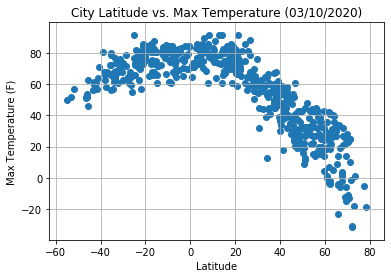

<Figure size 432x288 with 0 Axes>

In [13]:
weather_data.plot.scatter(x='Lat',
                      y='Max Temp')
plt.scatter(weather_data["Lat"],weather_data["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (03/10/2020)")
plt.grid()

plt.show()
plt.savefig('output_data/Lat_Max_Temp.png') 

In [ ]:
#The tempatures are increasing the closer they are to the 0 Lat line, 
#with a more intense drop in tempature when the Lat increases.

#### Latitude vs. Humidity Plot

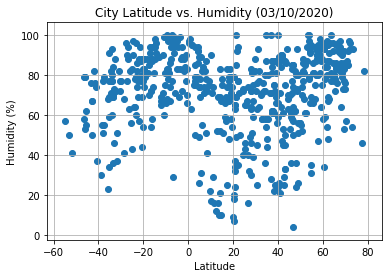

In [14]:
ax2 = weather_data.plot.scatter(x='Lat',
                      y='Humidity')
plt.scatter(weather_data["Lat"],weather_data["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (03/10/2020)")
plt.grid()
plt.savefig('output_data/Lat_Humidity.png')
plt.show()

In [ ]:
#Humidity is showing to be more consistant while showing more cities with high humidity at 0 Lat, 
#while others other have cities in high humidty they are more spread out as well.

#### Latitude vs. Cloudiness Plot

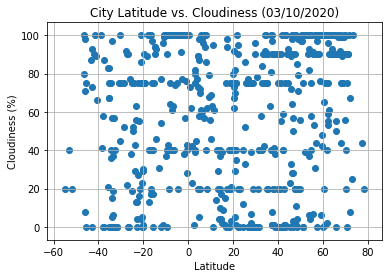

In [15]:
ax3 = weather_data.plot.scatter(x='Lat',
                      y='Cloudiness')
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (03/10/2020)")
plt.grid()
plt.savefig('output_data/Lat_Cloudiness.png')
plt.show()

In [16]:
#Cloudiness is showing to be more diverse across all the Latitudes.

#### Latitude vs. Wind Speed Plot

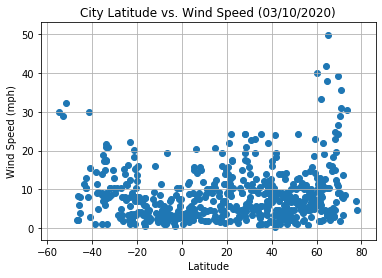

In [17]:
ax4 = weather_data.plot.scatter(x='Lat',
                      y='Wind Speed')
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (03/10/2020)")
plt.grid()
plt.savefig('output_data/Lat_Wind.png')
plt.show()

In [ ]:
#Wind speeds are showing to be more consistently slower closer to the 0 Lat.

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (line_eq, rvalue, regress_values)

In [19]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (greater than or equal to 0 degrees latitude) 
northern = weather_data.loc[(weather_data["Lat"]>=0)]

#Southern Hemisphere (less than 0 degrees latitude)
southern= weather_data.loc[(weather_data["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8898796070772356


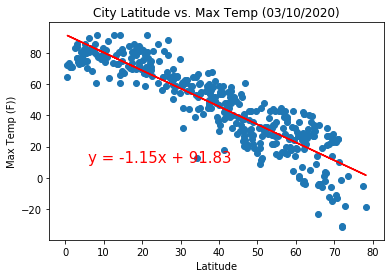

In [20]:
northern.plot.scatter(x='Lat',
                      y='Max Temp')
plt.scatter(northern["Lat"],northern["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
plt.title("City Latitude vs. Max Temp (03/10/2020)")
reg = regression(northern["Lat"],northern["Max Temp"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_maxtemp_Lat_LinRegress.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6195323763486245


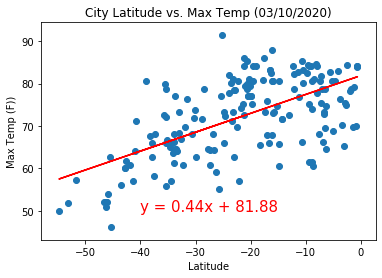

In [31]:
southern.plot.scatter(x='Lat',
                      y='Max Temp')
plt.scatter(southern["Lat"],southern["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
plt.title("City Latitude vs. Max Temp (03/10/2020)")
reg = regression(southern["Lat"],southern["Max Temp"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/southern_maxtemp_Lat_LinRegress.png')
plt.show()

In [ ]:
#Northern Hemisphere is showing a strong inverse coorelation to Lat and Max Temp. 
#Showing the further away from 0 Lat the warmer the Max Temp is.

#Souther Hemisphere is showing a less strong correlation than the northern hemisphere, 
#but does show at a slower rate that the max temp decreases when moving south of 0 Lat.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28087091023678556


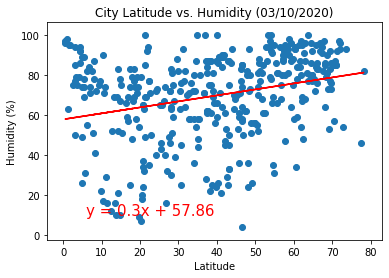

In [22]:
northern.plot.scatter(x='Lat',
                      y='Humidity')
plt.scatter(northern["Lat"],northern["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (03/10/2020)")
reg = regression(northern["Lat"],northern["Humidity"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_humidity_Lat_LinRegress.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.45907926864517806


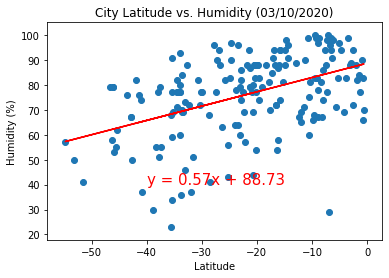

In [23]:
southern.plot.scatter(x='Lat',
                      y='Humidity')
plt.scatter(southern["Lat"],southern["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (03/10/2020)")
reg = regression(southern["Lat"],southern["Humidity"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/southern_humidity_Lat_LinRegress.png')
plt.show()

In [ ]:
#We see that the southern hemisphere has a stronger coorelation to humidity and the city's latitude. 
#Showing that as the Latitude continues south of 0 Lat the Humidity slowly decreases.

#The northern hemisphere does show that moving north of 0 Lat shows that humidity increases slightly.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23633507629453168


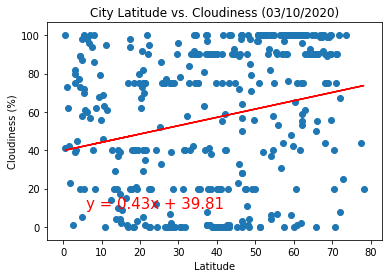

In [24]:
northern.plot.scatter(x='Lat',
                      y='Cloudiness')
plt.scatter(northern["Lat"],northern["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (03/10/2020)")
reg = regression(northern["Lat"],northern["Cloudiness"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_cloudiness_Lat_LinRegress.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23637708818090641


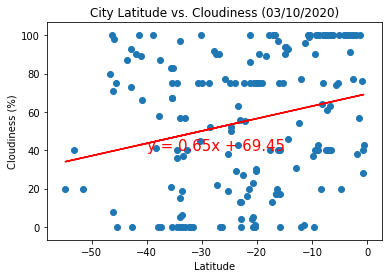

In [25]:
southern.plot.scatter(x='Lat',
                      y='Cloudiness')
plt.scatter(southern["Lat"],southern["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (03/10/2020)")
reg = regression(southern["Lat"],southern["Cloudiness"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/southern_cloudiness_Lat_LinRegress.png')
plt.show()

In [ ]:
#Both of the hemispheres show a weak coorelation between the cloudiness and City Lat, 
#while showing a slight increase in cloudiness the further north the city is. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19655317588737567


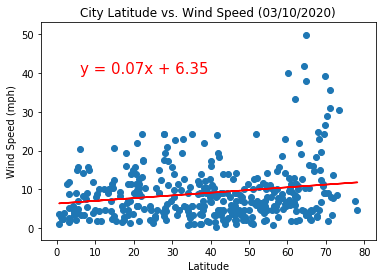

In [26]:
northern.plot.scatter(x='Lat',
                      y='Wind Speed')
plt.scatter(northern["Lat"],northern["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (03/10/2020)")
reg = regression(northern["Lat"],northern["Wind Speed"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_windspeed_Lat_LinRegress.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4566476768276629


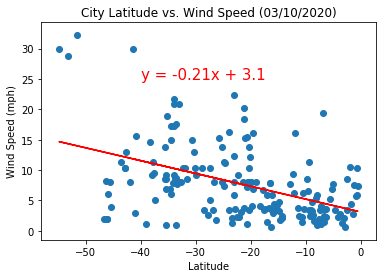

In [30]:
southern.plot.scatter(x='Lat',
                      y='Wind Speed')
plt.scatter(southern["Lat"],southern["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (03/10/2020)")
reg = regression(southern["Lat"],southern["Wind Speed"])
line_eq = reg[0]
rvalue = reg[1]
regress_values = reg[2]
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/southern_windspeed_Lat_LinRegress.png')
plt.show()

In [ ]:
#These correlations show that when moving away from the 0 Lat the winds increase slightly. 
#However the Southern Hemisphere shows a strong correlation between the wind speed and the latitude.